If you are using Conda you'll need to install these two libararies

In [14]:
pip install cvxpy

  Using cached clarabel-0.9.0-cp37-abi3-macosx_10_12_x86_64.macosx_11_0_arm64.macosx_10_12_universal2.whl.metadata (4.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.6 MB/s eta 0:00:00
Using cached clarabel-0.9.0-cp37-abi3-macosx_10_12_x86_64.macosx_11_0_arm64.macosx_10_12_universal2.whl (1.7 MB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import networkx as nx
import numpy as np
import pandas as pd
import itertools as it
import scipy
import random 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import cvxpy as cp

Exercise 1

In [99]:
G = nx.DiGraph()
edges = [
         ('o','a',{'capacity':3}), #e_1
         ('a','d',{'capacity':2}), #e_2
         ('o','b',{'capacity':3}), #e_3
         ('b','d',{'capacity':2}), #e_4
         ('b','c',{'capacity':3}), #e_5
         ('c','d',{'capacity':1}), #e_6
         ('a', 'b', {'capacity':1})#e_7
         ]

In [100]:
G.add_edges_from(edges)

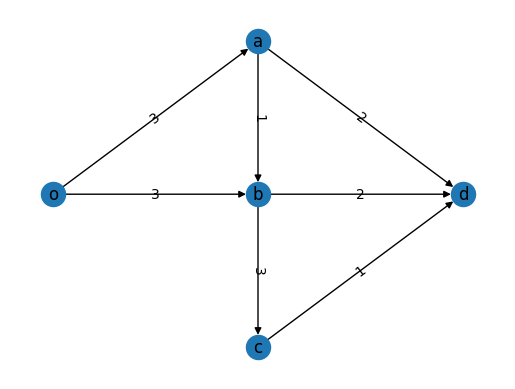

In [101]:
pos = {'o': [0,2], 'a': [2,4], 'b': [2,2], 'c': [2,0], 'd': [4,2] }
nx.draw_networkx_edge_labels(G,pos,nx.get_edge_attributes(G,'capacity'),font_color='black')
nx.draw(G,pos,with_labels=True)


Part a

Maximum Flow Value: 5
Partition: (5, ({'b', 'a', 'c', 'o'}, {'d'}))


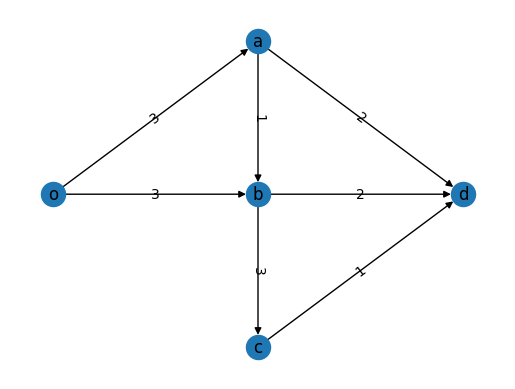

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with capacities
edges = [
         ('o', 'a', {'capacity': 3}),  # e_1: edge from o to a with capacity 3
         ('a', 'd', {'capacity': 2}),  # e_2: edge from a to d with capacity 2
         ('o', 'b', {'capacity': 3}),  # e_3: edge from o to b with capacity 3
         ('b', 'd', {'capacity': 2}),  # e_4: edge from b to d with capacity 2
         ('b', 'c', {'capacity': 3}),  # e_5: edge from b to c with capacity 3
         ('c', 'd', {'capacity': 1}),  # e_6: edge from c to d with capacity 1
         ('a', 'b', {'capacity': 1})   # e_7: edge from a to b with capacity 1
        ]
G.add_edges_from(edges)  # Add all edges to the graph

# Define positions for nodes in the graph for visualization
pos = {'o': [0, 2], 'a': [2, 4], 'b': [2, 2], 'c': [2, 0], 'd': [4, 2]}

# Draw edge labels to show capacities
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'capacity'), font_color='black')

# Draw the graph
nx.draw(G, pos, with_labels=True)

# Compute the maximum flow from node 'o' to node 'd'
flow_value, flow_dict = nx.maximum_flow(G, 'o', 'd', capacity='capacity')

# Output the results
print("Maximum Flow Value:", flow_value)  # Expected output: 5
print("Partition:", nx.minimum_cut(G, 'o', 'd'))  # Minimum cut partition


Part b

In [103]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from itertools import permutations

def increment_capacity(GG, x, added_edges=None):
    """
    Increment capacity step-by-step for a given graph GG up to x units.
    Optionally, a list of added edges can be specified for part 3.
    """
    for _ in range(x):
        # Calculate the current maximum flow
        current_thr = nx.maximum_flow_value(GG, 'o', 'd')
        capacity_increased = False
        first_candidate_edge = None

        # Iterate over all nodes to find potential capacity increase spots
        for node in GG.nodes:
            in_degree = GG.in_degree(node, 'capacity')
            out_degree = GG.out_degree(node, 'capacity')

            # Case 1: Node has fewer incoming capacities than outgoing
            if in_degree < out_degree:
                for edge in GG.edges:
                    if edge[1] == node:
                        if first_candidate_edge is None:
                            first_candidate_edge = edge
                        # Temporarily increase the capacity
                        GG[edge[0]][edge[1]]['capacity'] += 1
                        # Check if the maximum flow has improved
                        if nx.maximum_flow_value(GG, 'o', 'd') > current_thr:
                            capacity_increased = True
                            break
                        # Revert the capacity change if no improvement
                        GG[edge[0]][edge[1]]['capacity'] -= 1
                if capacity_increased:
                    break

            # Case 2: Node has more incoming capacities than outgoing
            elif in_degree > out_degree:
                for edge in GG.edges:
                    if edge[0] == node:
                        if first_candidate_edge is None:
                            first_candidate_edge = edge
                        # Temporarily increase the capacity
                        GG[edge[0]][edge[1]]['capacity'] += 1
                        # Check if the maximum flow has improved
                        if nx.maximum_flow_value(GG, 'o', 'd') > current_thr:
                            capacity_increased = True
                            break
                        # Revert the capacity change if no improvement
                        GG[edge[0]][edge[1]]['capacity'] -= 1
                if capacity_increased:
                    break

        # If no capacity increase was successful, use an alternative strategy
        if not capacity_increased:
            if first_candidate_edge is None:
                # Get all shortest paths from 'o' to 'd'
                shortest_paths_list = list(nx.all_shortest_paths(GG, 'o', 'd'))
                # Combine nodes from all available shortest paths
                if len(shortest_paths_list) > 0:
                    shortest_paths = set(shortest_paths_list[0])
                    if len(shortest_paths_list) > 1:
                        shortest_paths.update(shortest_paths_list[1])  # Add nodes from the second path if it exists

                    # Choose a random edge from those in the shortest paths
                    random_edge = random.choice([e for e in GG.edges if e[0] in shortest_paths and e[1] in shortest_paths])
                    GG[random_edge[0]][random_edge[1]]['capacity'] += 1
            else:
                # Increase capacity of the first candidate edge
                GG[first_candidate_edge[0]][first_candidate_edge[1]]['capacity'] += 1

    # Return the maximum throughput after increment
    return nx.maximum_flow_value(GG, 'o', 'd')


def evaluate_throughput(graph, max_additional_capacity, added_edges=None):
    """
    Evaluate maximum throughput from o to d for each x in range(max_additional_capacity).
    If added_edges are provided, it simulates adding a new edge for part 3.
    """
    df_dict = {'x': [], 'thr_max': []}
    
    # Iterate over additional capacities
    for x in range(max_additional_capacity):
        # Create a copy of the graph to modify
        GG = nx.DiGraph(graph)

        # If there are edges to add (part 3), apply them first
        if added_edges:
            for u, v, cap in added_edges:
                GG.add_edge(u, v, capacity=cap)
        
        # Increment capacity for this x value
        thr_max = increment_capacity(GG, x, added_edges)
        df_dict['x'].append(x)
        df_dict['thr_max'].append(thr_max)

        # Debug output every 5 iterations
        if x % 5 == 0:
            print(f"x = {x}, Throughput: {thr_max}")
            print("Capacities:", nx.get_edge_attributes(GG, 'capacity'))

    return df_dict




In [104]:
# Part 2: Evaluate throughput with additional x capacity distributed across existing links
def part2():
    print("Evaluating Part 2")
    max_capacity = 25  # The maximum additional capacity
    df_dict = evaluate_throughput(G, max_capacity)

    # Plot results for Part 2
    plt.figure(figsize=(10, 6))
    plt.plot(df_dict['x'], df_dict['thr_max'], marker='o', linestyle='-', color='blue')
    plt.title('Maximum Throughput vs Additional Capacity (Part 2)')
    plt.xlabel('Additional Capacity (x)')
    plt.ylabel('Maximum Throughput')
    plt.grid(True)
    plt.xticks(range(0, max_capacity, 1))
    plt.show()

Part c

In [108]:
# Part 3: Evaluate throughput with a new edge e_8
def part3(o_d_path=False):
    print("Evaluating Part 3")
    max_capacity = 25  # The maximum additional capacity for the new edge
    best_combination = None
    best_throughput = 0
    second_best_combination = None
    second_best_throughput = 0

    # Define possible node combinations excluding 'o' to 'd' and outgoing edges from 'd'
    if o_d_path == False:
        node_combinations = [(u, v) for u, v in permutations(G.nodes, 2) if u != 'd' and (u, v) != ('o', 'd')]
    else:
        node_combinations = [(u, v) for u, v in permutations(G.nodes, 2) if u != 'd']

    # Iterate over each possible combination of new edge placements
    for node_pair in node_combinations:
        print(f"Testing link e_8 between {node_pair[0]} -> {node_pair[1]}")
        df_dict = evaluate_throughput(G, max_capacity, [(node_pair[0], node_pair[1], 1)])

        # Update the best and second-best combinations based on throughput
        max_thr_for_combo = max(df_dict['thr_max'])
        if max_thr_for_combo > best_throughput:
            second_best_throughput = best_throughput
            second_best_combination = best_combination
            best_throughput = max_thr_for_combo
            best_combination = node_pair
        elif max_thr_for_combo > second_best_throughput:
            second_best_throughput = max_thr_for_combo
            second_best_combination = node_pair

    # Print the best and second-best combinations
    print(f"Best combination: {best_combination} with maximum throughput of {best_throughput}")
    if second_best_combination:
        print(f"Second-best combination: {second_best_combination} with throughput of {second_best_throughput}")

    # Plot results for the best combination in Part 3
    best_df_dict = evaluate_throughput(G, max_capacity, [(best_combination[0], best_combination[1], 1)])
    plt.figure(figsize=(10, 6))
    plt.plot(best_df_dict['x'], best_df_dict['thr_max'], marker='o', linestyle='-', color='blue')
    plt.title(f'Maximum Throughput vs Additional Capacity (Best Edge: {best_combination})')
    plt.xlabel('Additional Capacity (x)')
    plt.ylabel('Maximum Throughput')
    plt.grid(True)
    plt.xticks(range(0, max_capacity, 1))
    plt.show()

Evaluating Part 2
x = 0, Throughput: 5
Capacities: {('o', 'a'): 3, ('o', 'b'): 3, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 1}
x = 5, Throughput: 7
Capacities: {('o', 'a'): 4, ('o', 'b'): 4, ('a', 'd'): 2, ('a', 'b'): 2, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 3}
x = 10, Throughput: 10
Capacities: {('o', 'a'): 5, ('o', 'b'): 5, ('a', 'd'): 5, ('a', 'b'): 1, ('b', 'd'): 3, ('b', 'c'): 3, ('c', 'd'): 3}
x = 15, Throughput: 13
Capacities: {('o', 'a'): 7, ('o', 'b'): 6, ('a', 'd'): 6, ('a', 'b'): 1, ('b', 'd'): 4, ('b', 'c'): 3, ('c', 'd'): 3}
x = 20, Throughput: 14
Capacities: {('o', 'a'): 9, ('o', 'b'): 5, ('a', 'd'): 5, ('a', 'b'): 4, ('b', 'd'): 6, ('b', 'c'): 3, ('c', 'd'): 3}


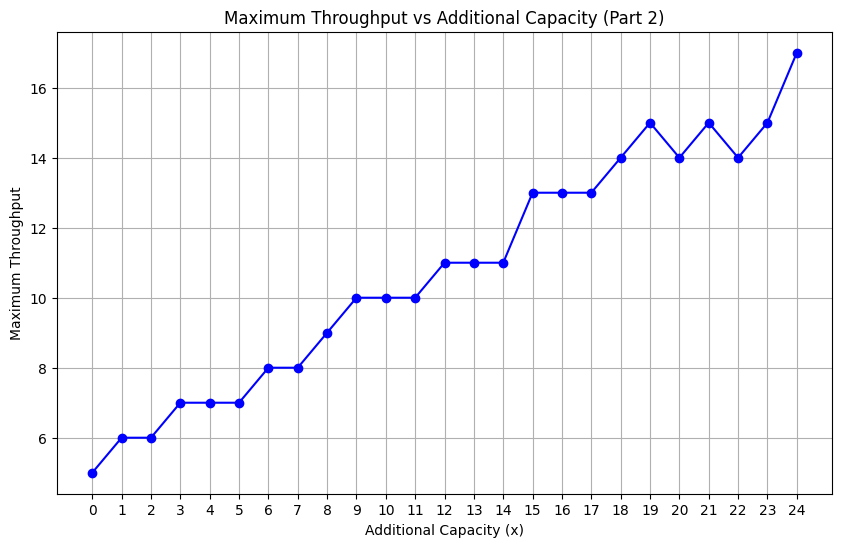

In [106]:
part2()

Evaluating Part 3
Testing link e_8 between o -> a
x = 0, Throughput: 4
Capacities: {('o', 'a'): 1, ('o', 'b'): 3, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 1}
x = 5, Throughput: 7
Capacities: {('o', 'a'): 3, ('o', 'b'): 4, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 3}
x = 10, Throughput: 9
Capacities: {('o', 'a'): 5, ('o', 'b'): 5, ('a', 'd'): 4, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 3}
x = 15, Throughput: 12
Capacities: {('o', 'a'): 7, ('o', 'b'): 5, ('a', 'd'): 6, ('a', 'b'): 1, ('b', 'd'): 3, ('b', 'c'): 3, ('c', 'd'): 3}
x = 20, Throughput: 12
Capacities: {('o', 'a'): 7, ('o', 'b'): 6, ('a', 'd'): 2, ('a', 'b'): 5, ('b', 'd'): 7, ('b', 'c'): 3, ('c', 'd'): 3}
Testing link e_8 between o -> b
x = 0, Throughput: 4
Capacities: {('o', 'a'): 3, ('o', 'b'): 1, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 1}
x = 5, Throughput: 7
Capacities: {('o', 'a'): 3, ('o', 'b'): 4, ('a', 'd'): 2, 

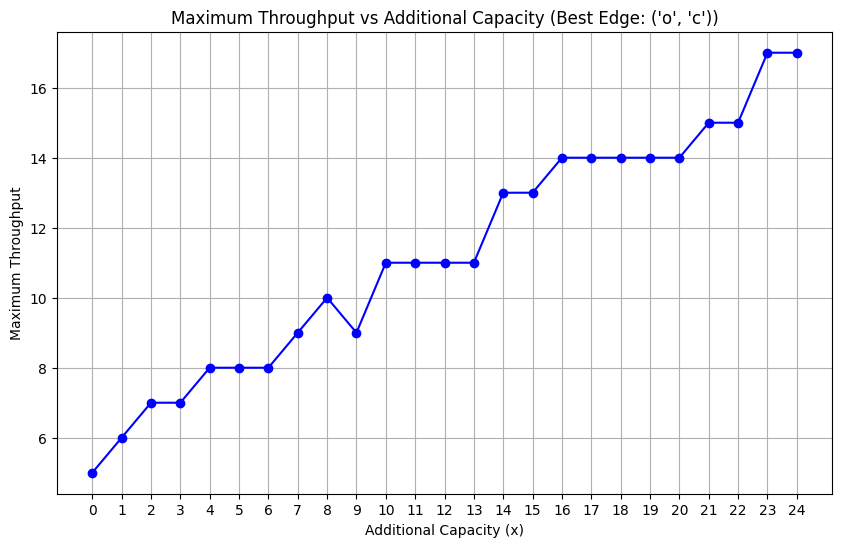

In [109]:
part3(o_d_path=False)

Evaluating Part 3
Testing link e_8 between o -> a
x = 0, Throughput: 4
Capacities: {('o', 'a'): 1, ('o', 'b'): 3, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 1}
x = 5, Throughput: 7
Capacities: {('o', 'a'): 3, ('o', 'b'): 4, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 3}
x = 10, Throughput: 9
Capacities: {('o', 'a'): 4, ('o', 'b'): 5, ('a', 'd'): 3, ('a', 'b'): 2, ('b', 'd'): 3, ('b', 'c'): 3, ('c', 'd'): 3}
x = 15, Throughput: 11
Capacities: {('o', 'a'): 7, ('o', 'b'): 5, ('a', 'd'): 4, ('a', 'b'): 2, ('b', 'd'): 4, ('b', 'c'): 3, ('c', 'd'): 3}
x = 20, Throughput: 14
Capacities: {('o', 'a'): 8, ('o', 'b'): 6, ('a', 'd'): 6, ('a', 'b'): 2, ('b', 'd'): 5, ('b', 'c'): 3, ('c', 'd'): 3}
Testing link e_8 between o -> d
x = 0, Throughput: 6
Capacities: {('o', 'a'): 3, ('o', 'b'): 3, ('o', 'd'): 1, ('a', 'd'): 2, ('a', 'b'): 1, ('b', 'd'): 2, ('b', 'c'): 3, ('c', 'd'): 1}
x = 5, Throughput: 10
Capacities: {('o', 'a'): 3, ('o', 'b'): 4,

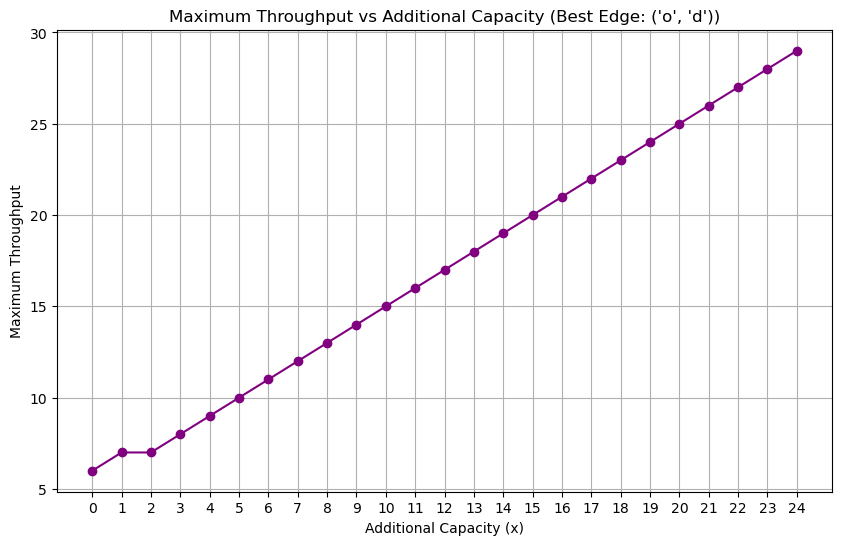

In [50]:
part3(o_d_path=True)

Exercise 2

In [50]:
edges = [('a1','b1'),
         ('a1','b2'),
         ('a2','b2'),
         ('a2','b3'),
         ('a3','b1'),
         ('a3','b4'),
         ('a4','b1'),
         ('a4','b2'),
         ('a4','b4')
         ]


In [51]:
G = nx.DiGraph()
G.add_edges_from(edges)

In [52]:
pos = {'a1': [0,6], 
       'a2': [0,4], 
       'a3': [0,2], 
       'a4': [0,0], 
       'b1': [2,6] , 
       'b2': [2,4], 
       'b3': [2,2], 
       'b4': [2,0]
       }

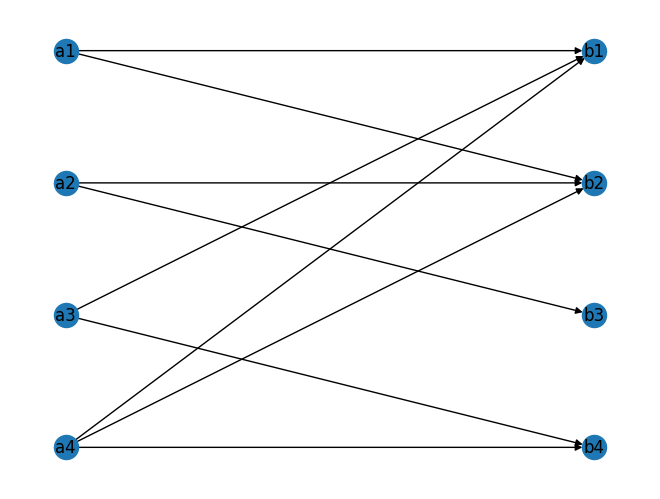

In [53]:
nx.draw(G,pos,with_labels=True)

Perfect matching exists: True
Perfect Match: {'a1': 'b2', 'a2': 'b3', 'a3': 'b1', 'a4': 'b4'}


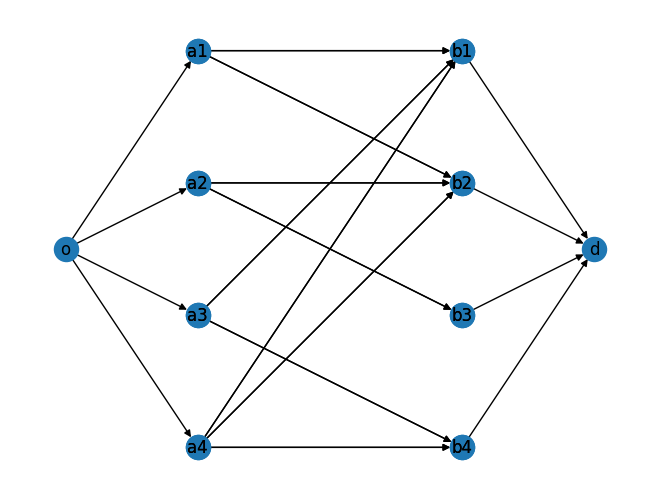

In [75]:
import networkx as nx

# Define edges for the bipartite graph (representing preferences)
edges = [
    ('a1', 'b1'), ('a1', 'b2'),
    ('a2', 'b2'), ('a2', 'b3'),
    ('a3', 'b1'), ('a3', 'b4'),
    ('a4', 'b1'), ('a4', 'b2'), ('a4', 'b4')
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Define positions for the nodes for visualization
pos = {
    'a1': [0, 6], 'a2': [0, 4], 'a3': [0, 2], 'a4': [0, 0],
    'b1': [2, 6], 'b2': [2, 4], 'b3': [2, 2], 'b4': [2, 0]
}

# Visualize the bipartite graph
nx.draw(G, pos, with_labels=True)
# Save the first visualization (fig1.png)

# Create a new graph for max-flow analysis
G2 = nx.DiGraph(G)

# Add source 'o' and sink 'd'
for i in range(len(G2.nodes) // 2):
    G2.add_edge('o', f"a{i+1}")  # Source to people
    G2.add_edge(f"b{i+1}", 'd')  # Foods to sink
pos['o'] = [-1, 3]  # Position for source
pos['d'] = [3, 3]   # Position for sink

# Visualize the flow network
nx.draw(G2, pos, with_labels=True)
# Save the second visualization (fig2.png)

# Assign capacity of 1 to all edges
for e in G2.edges:
    G2[e[0]][e[1]]['capacity'] = 1

# Calculate maximum flow
max_flow_bip = nx.maximum_flow(G2, 'o', 'd')

# Extract the perfect matching from the flow results
perfect_matches = {}
for node, edge_caps in max_flow_bip[1].items():
    if node.startswith('a'):  # Match only people nodes
        for edge, cap in edge_caps.items():
            if cap != 0:
                perfect_matches[node] = edge

# Check if the matching is perfect
is_perfect = nx.is_perfect_matching(G, perfect_matches)
print(f"Perfect matching exists: {is_perfect}")
print(f"Perfect Match: {perfect_matches}")


Part B

Maximum flow value for part (b): 8


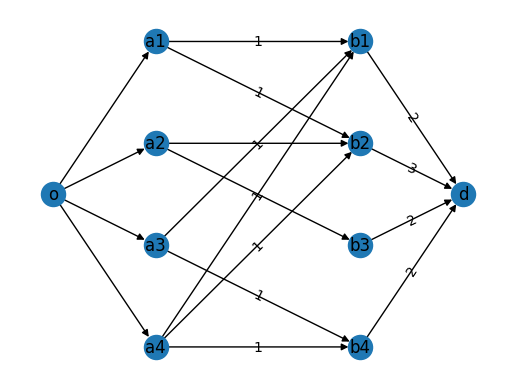

In [73]:
# Create a new graph for multiple portions
G3 = nx.DiGraph(G)

# Add source 'o' and sink 'd'
for i in range(len(G3.nodes) // 2):
    G3.add_edge('o', f"a{i+1}")  # Source to people
    G3.add_edge(f"b{i+1}", 'd')  # Foods to sink
pos['o'] = [-1, 3]  # Position for source
pos['d'] = [3, 3]   # Position for sink

# Assign capacities based on food portions
for edge in G3.edges:
    if edge[0].startswith('b'):  # Food to sink edges
        if edge[0].endswith('2'):  # Special case for b2
            G3[edge[0]][edge[1]]['capacity'] = 3
        else:
            G3[edge[0]][edge[1]]['capacity'] = 2
    if edge[0].startswith('a'):  # People to food edges
        G3[edge[0]][edge[1]]['capacity'] = 1

# Visualize the flow network with capacities
nx.draw_networkx_edge_labels(G3, pos, nx.get_edge_attributes(G3, 'capacity'))
nx.draw(G3, pos, with_labels=True)
# Save the third visualization (fig3.png)

# Calculate maximum flow
max_flow_value_b = nx.maximum_flow_value(G3, 'o', 'd')
print(f"Maximum flow value for part (b): {max_flow_value_b}")


Part 3

Maximum flow value for part (c): 9


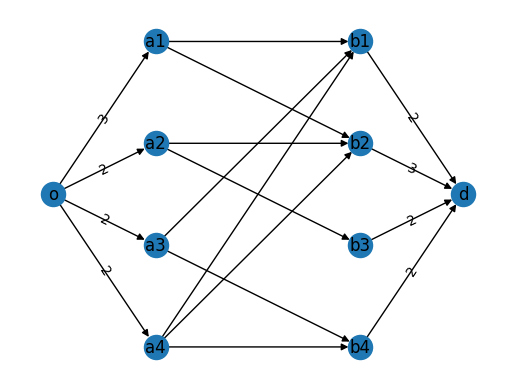

In [74]:
# Create a new graph for specific demands
G4 = nx.DiGraph(G)

# Add source 'o' and sink 'd'
for i in range(len(G4.nodes) // 2):
    G4.add_edge('o', f"a{i+1}")  # Source to people
    G4.add_edge(f"b{i+1}", 'd')  # Foods to sink

# Assign capacities based on specific demands
for edge in G4.edges:
    if edge[1].startswith('a'):  # Source to people edges
        if edge[1].endswith('1'):  # Special case for a1
            G4[edge[0]][edge[1]]['capacity'] = 3
        else:
            G4[edge[0]][edge[1]]['capacity'] = 2
    elif edge[0].startswith('b'):  # Food to sink edges
        if edge[0].endswith('2'):  # Special case for b2
            G4[edge[0]][edge[1]]['capacity'] = 3
        else:
            G4[edge[0]][edge[1]]['capacity'] = 2

# Visualize the flow network with capacities
nx.draw_networkx_edge_labels(G4, pos, nx.get_edge_attributes(G4, 'capacity'))
nx.draw(G4, pos, with_labels=True)
# Save the fourth visualization (fig4.png)

# Calculate maximum flow
max_flow_value_c = nx.maximum_flow_value(G4, 'o', 'd')
print(f"Maximum flow value for part (c): {max_flow_value_c}")


Exercise 3

Part a

Fastest Path: [1, 2, 3, 9, 13, 17]
Shortest Travel Time: 0.559833


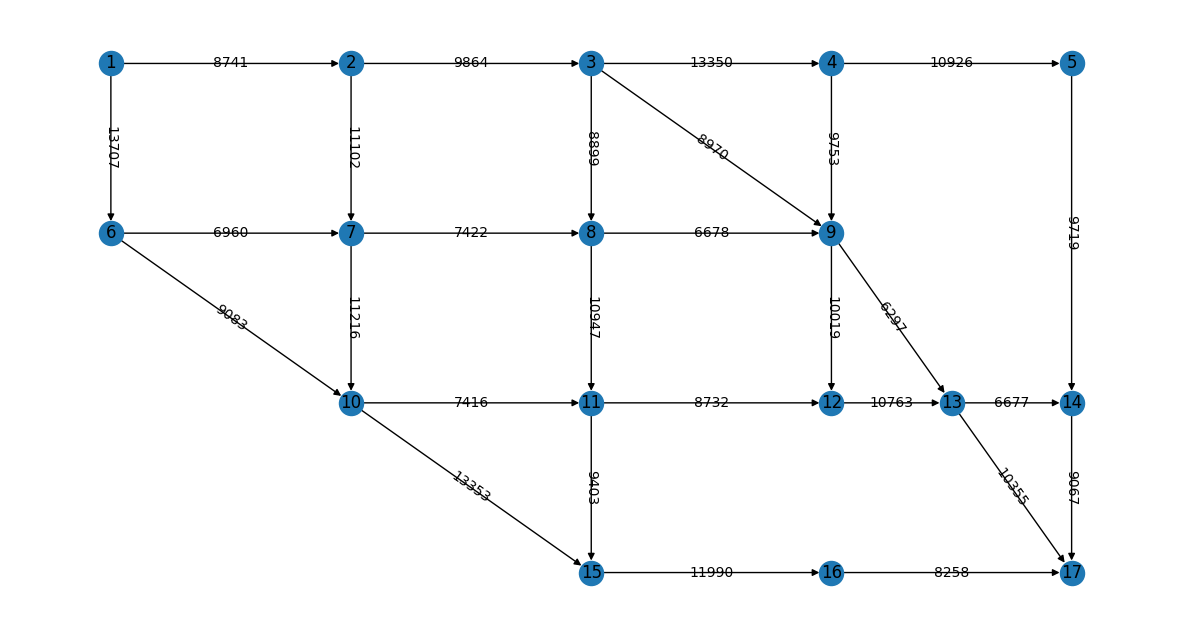

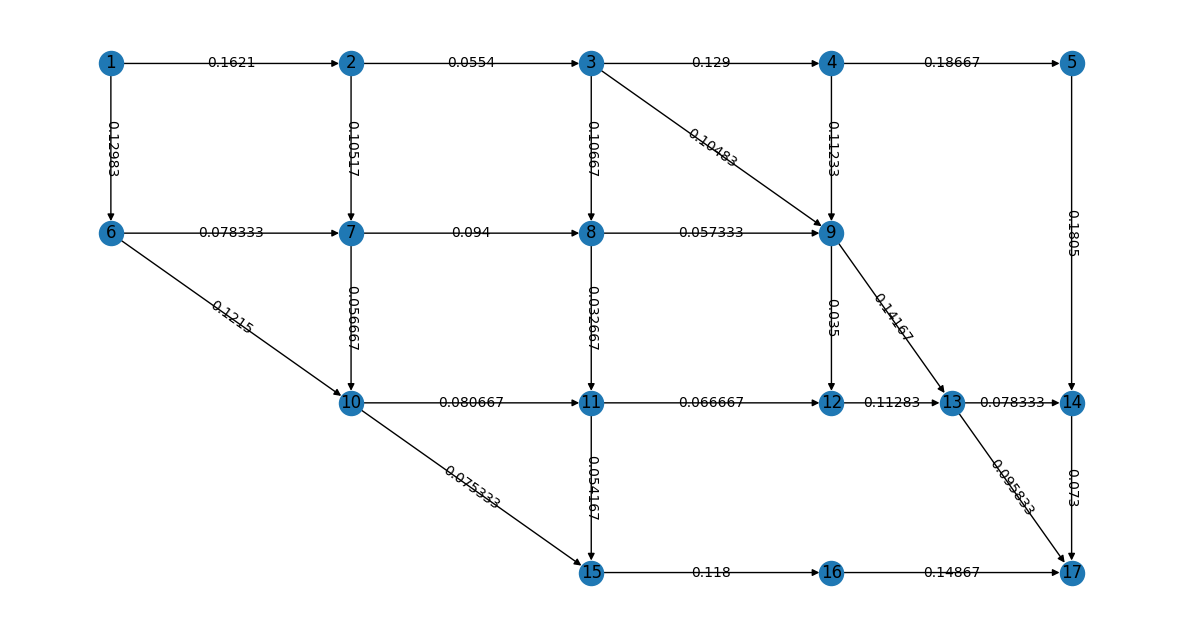

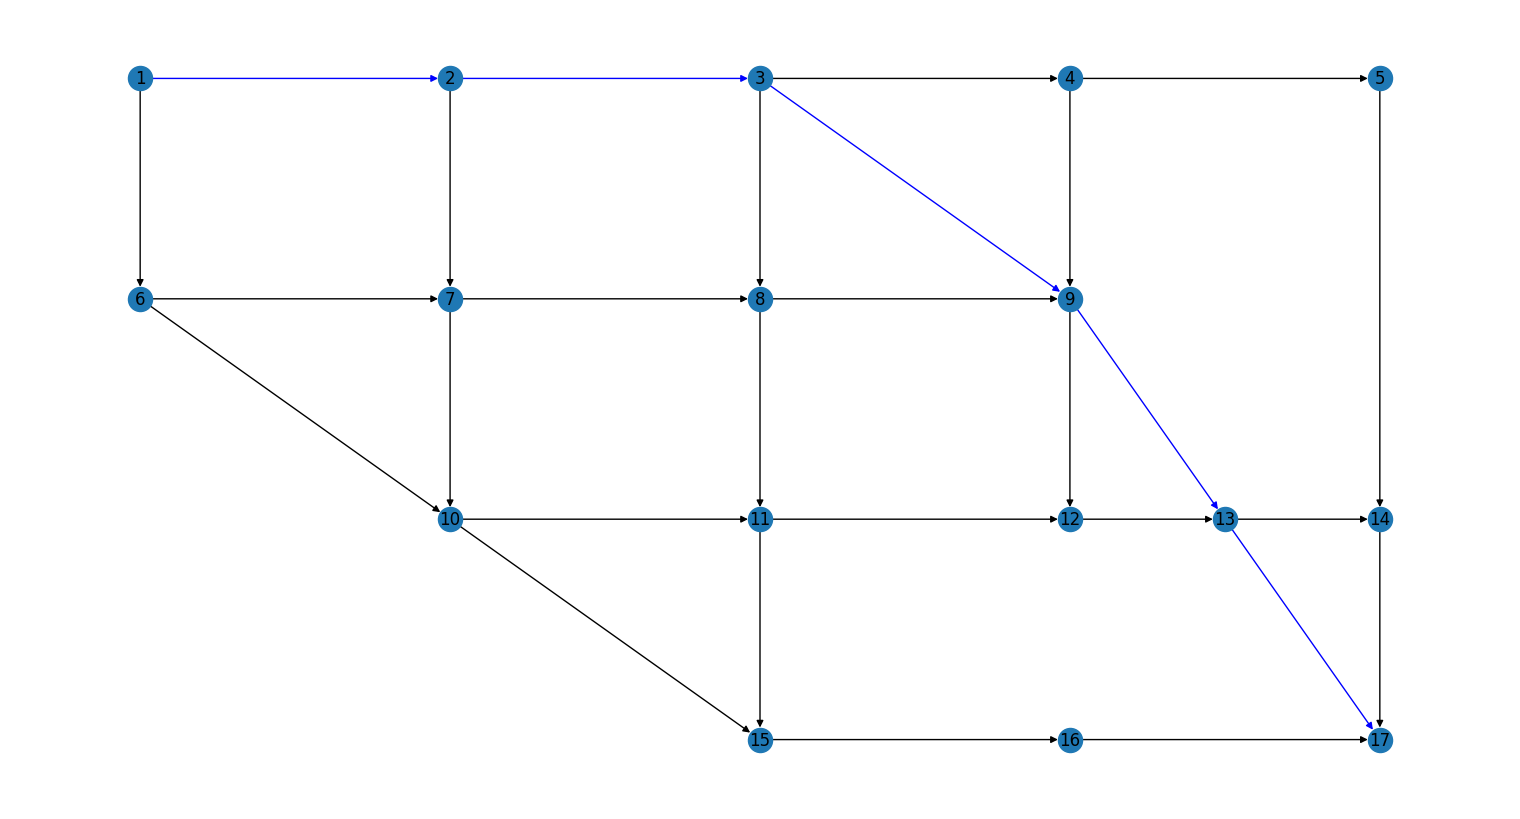

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io

# Load data from .mat files
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

# Create the directed graph and define positions of nodes
G = nx.DiGraph()
pos = {
    1:[0,4], 2:[1,4], 3:[2,4], 4:[3,4], 5:[4,4],
    6:[0,3], 7:[1,3], 8:[2,3], 9:[3,3], 10:[1,2],
    11:[2,2], 12:[3,2], 13:[3.5,2], 14:[4,2],
    15:[2,1], 16:[3,1], 17:[4,1]
}

# Manually define edges for the graph
sorted_edges = [
    (1,2), (2,3), (3,4), (4,5), (1,6), (6,7), (7,8), (8,9), (9,13),
    (2,7), (3,8), (3,9), (4,9), (5,14), (6,10), (10,11), (10,15),
    (7,10), (8,11), (9,12), (11,12), (12,13), (13,14), (11,15),
    (13,17), (14,17), (15,16), (16,17)
]

# Add edges to the graph with capacities and costs
for edge_num, edge in enumerate(sorted_edges):
    G.add_edge(edge[0], edge[1], capacity=C[edge_num], cost=l[edge_num])

# Visualize graph with capacities
plt.figure(figsize=(15,8))
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'capacity'))
nx.draw(G, pos, with_labels=True)
plt.savefig('fig1E3.svg', dpi=180)

# Visualize graph with costs
plt.figure(figsize=(15,8))
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'cost'))
nx.draw(G, pos, with_labels=True)
plt.savefig('fig2E3.svg', dpi=180)

# Find the shortest path from node 1 to node 17 based on travel time (cost)
fastest_path = nx.shortest_path(G, source=1, target=17, weight='cost')
print("Fastest Path:", fastest_path)  # Output: [1, 2, 3, 9, 13, 17]

# Calculate travel time for the fastest path
travel_time = sum(G[u][v]['cost'] for u, v in zip(fastest_path, fastest_path[1:]))
print("Shortest Travel Time:", travel_time)  # Output: 0.559833

# Highlight the fastest path in the graph
edge_colors = ['blue' if (u, v) in zip(fastest_path, fastest_path[1:]) else 'black' for u, v in G.edges]
plt.figure(figsize=(15,8))
nx.draw(G, pos, with_labels=True, edge_color=edge_colors)
plt.savefig('fig3E3_a.svg', dpi=180)

Part B 

In [77]:
# Calculate the maximum flow value from node 1 to node 17
max_flow_value = nx.maximum_flow_value(G, 1, 17, capacity='capacity')
print("Maximum Flow Value:", max_flow_value)  # Output: 22448

Maximum Flow Value: 22448


Part C

In [78]:
# Load flow vector from .mat file
f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)

# Compute the vector v = B @ f
v = B @ f

# Display the vector v in a formatted way
print("Vector v:")

print(v)



Vector v:
[ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In [81]:
nu = np.zeros(v.shape)
nu[0] = v[0]
nu[-1] = -v[0]

Part 4

In [82]:
# Assuming variables `l` (travel times), `C` (capacities), `B` (incidence matrix), and `nu` (demand vector) are loaded

# Define the delay function to compute the total delay
def compute_total_delay(f, func='regular'):
    """
    Computes the total delay based on the given flow `f`.
    :param f: Flow vector.
    :param func: Specifies the type of delay computation.
    :return: Total delay.
    """
    if func == 'regular':
        return np.sum(l * C / (1 - f / C) - l * C)
    elif func == 'new':
        return np.sum(l * C / (1 - f / C) - l * C + f * C)

# Define the optimization variable for flow
f_var = cp.Variable(f.shape)

# Define the optimization objective function (minimizing total delay)
objective = cp.Minimize(cp.sum(cp.multiply(l * C, cp.inv_pos(1 - f_var / C)) - l * C))

# Define the constraints for the flow
constraints = [
    B @ f_var == nu,  # Flow conservation constraint
    f_var >= 0,       # Non-negativity constraint
    f_var <= C        # Capacity constraint
]

# Define the optimization problem
problem_cp = cp.Problem(objective, constraints)

# Solve the optimization problem to find f^*
result = problem_cp.solve()

# Extract the optimal flow values
f_star = f_var.value

# Print the optimal flow
print('f^*: \n', f_star)

# Compute the total delay for the optimal flow f^*
total_delay = compute_total_delay(f_star)
print('Total delay for f^*: ', total_delay)


f^*: 
 [6.37458648e+03 5.66544280e+03 2.90469700e+03 2.90469515e+03
 9.90741352e+03 4.52798777e+03 2.95050425e+03 2.48738468e+03
 3.01825442e+03 7.09143680e+02 8.94419224e-03 2.76073686e+03
 1.84265590e-03 2.90469515e+03 5.37942575e+03 2.76619021e+03
 4.89986274e+03 2.28662720e+03 4.63128517e+02 2.22986896e+03
 3.22931627e+03 5.45918523e+03 2.30731755e+03 2.45326148e-03
 6.17012210e+03 5.21201270e+03 4.89986520e+03 4.89986520e+03]
Total delay for f^*:  23997.160893545046


Part e

In [83]:
# Define the optimization variable for flow
f_var = cp.Variable(f.shape)

# Define the objective function for the Wardrop equilibrium
# Here we minimize the integral of the delay function
objective = cp.Minimize(cp.sum(cp.multiply(-l * C, cp.log(1 - cp.multiply(f_var, cp.inv_pos(C))))))

# Define the constraints
constraints = [
    B @ f_var == nu,  # Flow conservation
    f_var >= 0,       # Non-negativity
    f_var <= C        # Capacity limits
]

# Solve the optimization problem
problem_cp_we = cp.Problem(objective, constraints)
result = problem_cp_we.solve()

# Extract the Wardrop equilibrium flow
f_w = f_var.value

# Compute total delay for Wardrop equilibrium
total_delay_we = compute_total_delay(f_w)

# Print results
print('Optimal f (Wardrop Equilibrium): \n', f_w)
print('Total delay (Wardrop Equilibrium): ', total_delay_we)

Optimal f (Wardrop Equilibrium): 
 [6.34959545e+03 6.17822408e+03 2.03775222e+03 2.03775221e+03
 9.93240455e+03 4.56732063e+03 2.73811937e+03 2.14413313e+03
 3.27077894e+03 1.71371371e+02 6.92104093e+01 4.07126145e+03
 6.80451564e-06 2.03775221e+03 5.36508392e+03 2.20295556e+03
 5.16270099e+03 2.00057263e+03 6.63196643e+02 2.94461565e+03
 2.86615219e+03 5.81076784e+03 2.43669203e+03 1.07681020e-05
 6.64485475e+03 4.47444424e+03 5.16270100e+03 5.16270100e+03]
Total delay (Wardrop Equilibrium):  24341.24307789489


Part f

In [91]:
# Define the optimization variable for flow
f_var = cp.Variable(f.shape)

# Calculate tolls for each link based on the given formula
# ω_e = f^*_e τ'_e(f^*_e) - τ_e(f^*_e)
omega = f_star * (C * l / ((C - f_star) ** 2)) - (l / (C - f_star))

# Define the objective function
# This minimizes the total cost, which includes the delay function τ_e(f_e) and the tolls ω_e
objective = cp.Minimize(cp.sum(
    cp.multiply(l, C) * -cp.log(1 - f_var / C) + cp.multiply(f_var, omega)
))

# Define the constraints
constraints = [
    B @ f_var == nu,  # Flow conservation: ensures that flows entering and exiting nodes are balanced
    f_var >= 0,       # Non-negativity: flow cannot be negative
    f_var <= C        # Capacity constraints: flow cannot exceed link capacities
]

# Create and solve the optimization problem
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Extract the optimal flow under tolls (new Wardrop equilibrium)
f_w_tolls = f_var.value

# Print the results
print('Optimal f with tolls: \n', f_w_tolls)

# Optional: You can compute and print the total delay with the computed flow
total_delay = compute_total_delay(f_w_tolls)
print('Total delay with tolls: ', total_delay)

Optimal f with tolls: 
 [6.35019516e+03 6.14989182e+03 2.07486306e+03 2.07486305e+03
 9.93180475e+03 4.56581933e+03 2.75142927e+03 2.14188680e+03
 3.26087368e+03 2.00303343e+02 2.93423949e+01 4.04568637e+03
 8.51138635e-06 2.07486305e+03 5.36598542e+03 2.22948179e+03
 5.15119703e+03 2.01469340e+03 6.38884859e+02 2.92669949e+03
 2.86836664e+03 5.79506613e+03 2.42864506e+03 1.32307929e-05
 6.62729476e+03 4.50350811e+03 5.15119705e+03 5.15119705e+03]
Total delay with tolls:  24315.19577298263


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cvxpy/expressions/expression.py:667: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)


Part g

In [92]:
import cvxpy as cp

# PART (g): Compute the system optimum flow and verify Wardrop equilibrium with tolls

# Define the flow variable to optimize
f_var = cp.Variable(f.shape)

# Define the objective function for the system optimum
# Minimize the additional travel time compared to free flow:
# ψ_e(f_e) = f_e(τ_e(f_e) - l_e)
objective = cp.Minimize(cp.sum(cp.multiply(l * C, cp.inv_pos(1 - f_var / C)) - l * C - cp.multiply(f_var, l)))

# Define constraints for the optimization
constraints = [
    B @ f_var == nu,  # Flow conservation: net flow at each node must equal supply/demand
    f_var >= 0,       # Non-negativity constraint: flow on any edge cannot be negative
    f_var <= C        # Capacity constraint: flow cannot exceed the edge capacity
]

# Solve the optimization problem to find the system optimum flow (f^*)
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Extract the system optimum flow (f^*)
f_star_new = f_var.value
print('Optimal f:', f_star_new)

# Calculate the total delay for the system optimum flow (using the 'new' cost function)
total_delay_f_star_new = compute_total_delay(f_star_new, 'new')
print('Total delay for f^*:', total_delay_f_star_new)

# PART (g): Compute the toll vector w* to align Wardrop equilibrium with f^*

# Define the toll variable
w_var = cp.Variable(l.shape)

# Define the objective to compute the toll vector w*:
# Minimize the difference between the system optimum flow and the cost with tolls
objective = cp.Minimize(cp.sum(
    -cp.multiply(l * C, cp.log(1 - cp.multiply(f_star_new, cp.inv_pos(C))))
    - f_star_new * l + cp.multiply(f_star_new, w_var)
))

# Define constraints for the toll optimization
constraints = [w_var >= 0]  # Tolls must be non-negative

# Solve the optimization problem to find the toll vector (w^*)
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Extract the toll vector (w^*)
w_star_opt = w_var.value
print('Optimal w*:', w_star_opt)

# PART (g): Compute the Wardrop equilibrium with the constructed tolls (f^(w*))

# Define the flow variable for the Wardrop equilibrium
f_var = cp.Variable(f.shape)

# Define the objective function for Wardrop equilibrium with tolls:
# Minimize the total travel cost, including delays (τ_e(f_e)) and tolls (w*)
objective = cp.Minimize(cp.sum(
    -cp.multiply(l * C, cp.log(1 - f_var / C)) - cp.multiply(f_var, l) + cp.multiply(f_var, w_star_opt)
))

# Define constraints for the Wardrop equilibrium optimization
constraints = [
    B @ f_var == nu,  # Flow conservation
    f_var >= 0,       # Non-negativity constraint
    f_var <= C        # Capacity constraint
]

# Solve the optimization problem to find the Wardrop equilibrium flow with tolls (f^(w*))
prob = cp.Problem(objective, constraints)
result = prob.solve()

# Extract the Wardrop equilibrium flow (f^(w*))
f_w_tolls_new = f_var.value
print('Optimal f with w*:', f_w_tolls_new)

# Calculate the total delay for the Wardrop equilibrium flow with tolls
total_delay_f_w_tolls_new = compute_total_delay(f_w_tolls_new, 'new')
print('Total delay for f^(w*):', total_delay_f_w_tolls_new)


Optimal f: [6.39406017e+03 5.42061383e+03 3.24368805e+03 3.24367159e+03
 9.88793983e+03 4.53049520e+03 3.05171489e+03 2.61218469e+03
 2.89543797e+03 9.73446344e+02 1.49529330e-02 2.17691083e+03
 1.64562896e-02 3.24367159e+03 5.35744463e+03 2.96982990e+03
 4.83984139e+03 2.45222666e+03 4.39545145e+02 1.89367401e+03
 3.40936743e+03 5.30304143e+03 2.14024211e+03 7.62006465e-03
 6.05823729e+03 5.38391370e+03 4.83984901e+03 4.83984901e+03]
Total delay for f^*: 972664367.6896338
Optimal w*: [-5.73957419e-13 -5.41404158e-13 -2.40884066e-13 -2.40360692e-13
 -5.95874431e-13 -4.78286673e-13 -1.72852909e-13  4.50486885e-14
 -1.07350983e-13  4.43122624e-12  5.50775849e-07  4.05919742e-13
  5.16429519e-07 -2.40360692e-13 -5.37755679e-13 -1.40218495e-13
 -5.05564287e-13  1.55458302e-13  1.55509637e-11  7.79618016e-13
 -2.88949609e-13 -5.35348598e-13  4.46161960e-13  8.88853784e-07
 -5.65569502e-13 -5.39591555e-13 -5.05623056e-13 -5.05623056e-13]
Optimal f with w*: [6.48254150e+03 5.56194149e+03 3.08

In [93]:
compute_total_delay(f_w_tolls_new,'new')/compute_total_delay(f_star_new,'new')

1.0004160317064068